In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
sales_data = pd.read_csv("BMW_Car_Sales_Classification.csv")
sales_data.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [3]:
sales_data.columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')

In [4]:
print("Information related to BMW Sales data :")
sales_data.info()

Information related to BMW Sales data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [5]:
sales_data['Year'] = sales_data['Year'].astype(str)

Text(0, 0.5, 'Target Variable')

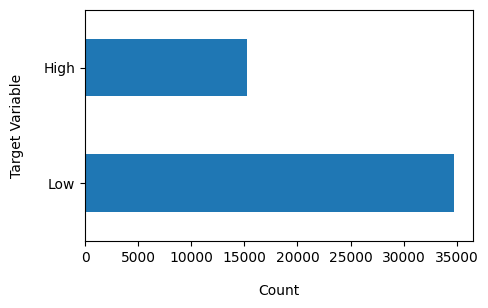

In [6]:
sales_data['Sales_Classification'].value_counts().plot(kind = 'barh',figsize=(5,3))
plt.xlabel("Count",labelpad = 14)
plt.ylabel("Target Variable",labelpad = 14)

In [7]:
100*sales_data['Sales_Classification'].value_counts()/len(sales_data['Sales_Classification'])

Sales_Classification
Low     69.508
High    30.492
Name: count, dtype: float64

Data is imbalanced

In [8]:
# Statistics value for Numeric Data
sales_data.describe()

,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,3.247180,100307.203140,75034.600900,5067.514680
std,1.009078,57941.509344,25998.248882,2856.767125
min,1.500000,3.000000,30000.000000,100.000000
25%,2.400000,50178.000000,52434.750000,2588.000000
50%,3.200000,100388.500000,75011.500000,5087.000000
75%,4.100000,150630.250000,97628.250000,7537.250000
max,5.000000,199996.000000,119998.000000,9999.000000


## Data Cleaning

In [9]:
sales_data_1 = sales_data.copy()

In [10]:
# Check if contain any null value
sales_data_1.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [11]:
print("No of duplicates in data : ",sales_data_1.duplicated().sum())

No of duplicates in data :  0


Data doesn't contain any duplicate and null value

## Data Visualization

In [12]:
target = sales_data_1['Sales_Classification']
data = sales_data_1.drop('Sales_Classification',axis = 1)
category_data = data.select_dtypes(include = ["object"])
category_data.columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission'], dtype='object')

**************************
Model
7 Series    4666
i3          4618
i8          4606
3 Series    4595
5 Series    4592
X1          4570
X3          4497
X5          4487
M5          4478
X6          4478
M3          4413
Name: count, dtype: int64


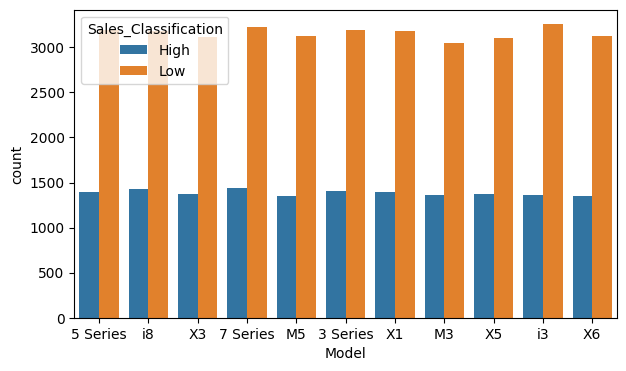

**************************
Year
2022    3478
2024    3427
2019    3392
2021    3372
2016    3365
2015    3358
2014    3350
2012    3332
2010    3330
2013    3326
2017    3290
2018    3278
2011    3278
2023    3219
2020    3205
Name: count, dtype: int64


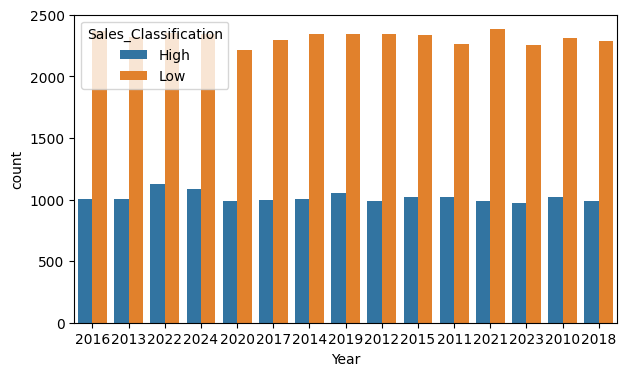

**************************
Region
Asia             8454
Middle East      8373
North America    8335
Europe           8334
Africa           8253
South America    8251
Name: count, dtype: int64


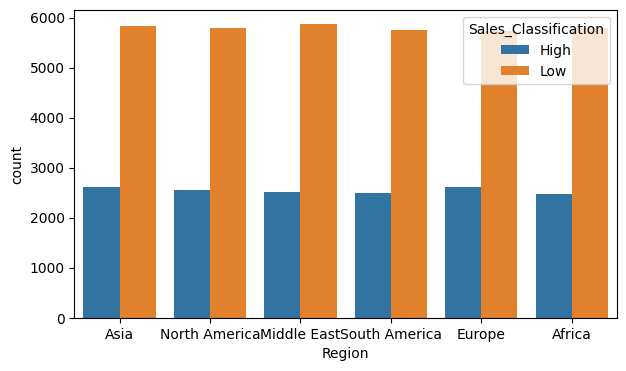

**************************
Color
Red       8463
Silver    8350
Grey      8348
White     8304
Black     8273
Blue      8262
Name: count, dtype: int64


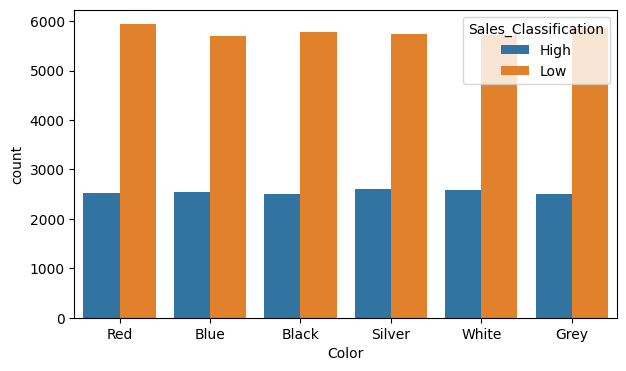

**************************
Fuel_Type
Hybrid      12716
Petrol      12550
Electric    12471
Diesel      12263
Name: count, dtype: int64


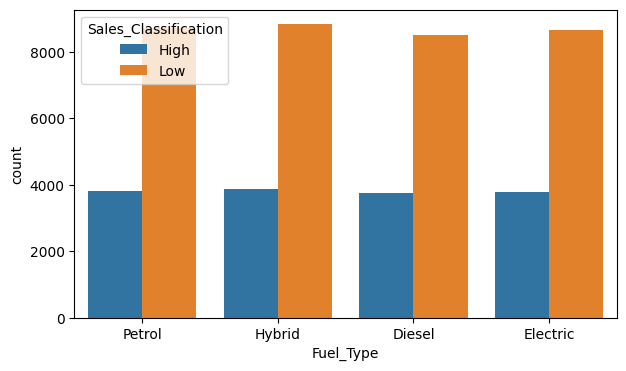

**************************
Transmission
Manual       25154
Automatic    24846
Name: count, dtype: int64


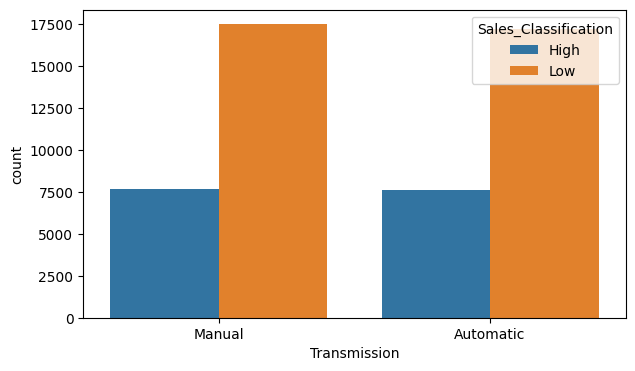

In [13]:
for i,column in enumerate(category_data):
    print("**************************")
    print(category_data[column].value_counts())
    plt.figure(figsize=(7,4))
    sns.countplot(data = sales_data_1,x = column,hue = 'Sales_Classification')
    plt.show()

No much observations are make.
All features looks similar

In [14]:
numeric_category = data.select_dtypes(include = ['int','float'])
numeric_category.columns

Index(['Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume'], dtype='object')

In [15]:
# Correlation matrix
corr = numeric_category.corr()
corr

,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
Engine_Size_L,1.000000,-0.004906,0.000146,-0.003942
Mileage_KM,-0.004906,1.000000,-0.004238,0.001434
Price_USD,0.000146,-0.004238,1.000000,0.000080
Sales_Volume,-0.003942,0.001434,0.000080,1.000000


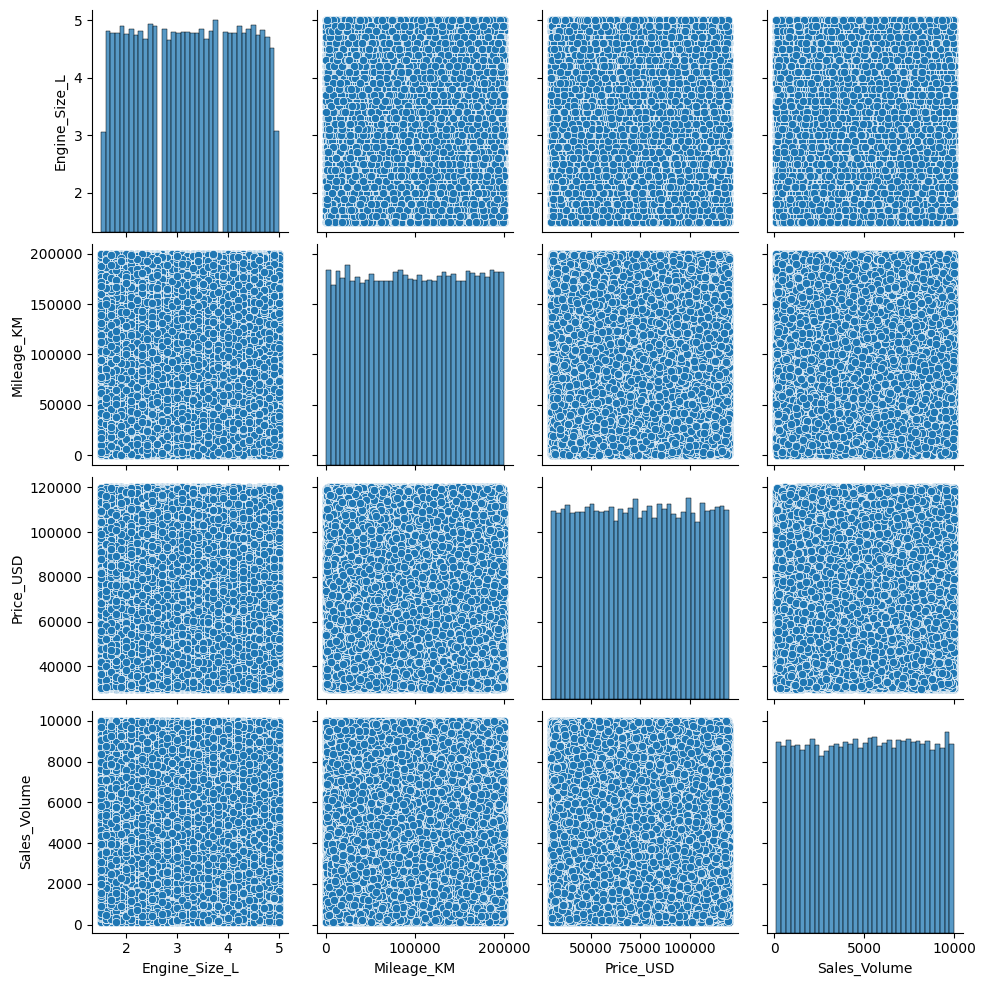

In [16]:
sns.pairplot(numeric_category)

In [17]:
for category in category_data:
    data[category] = LabelEncoder().fit_transform(data[category])
data

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
0,1,6,1,3,3,1,3.5,151748,98740,8300
1,10,3,4,3,2,0,1.6,121671,79219,3428
2,1,12,4,1,3,0,4.5,10991,113265,6994
3,6,14,3,1,3,0,1.7,27255,60971,4047
4,2,10,5,0,0,1,2.1,122131,49898,3080
...,...,...,...,...,...,...,...,...,...,...
49995,9,4,1,3,2,1,4.6,151030,42932,8182
49996,9,13,3,4,1,1,4.2,147396,48714,9816
49997,1,0,3,3,3,0,4.5,174939,46126,8280
49998,9,10,1,5,1,0,3.8,3379,58566,9486


<Axes: >

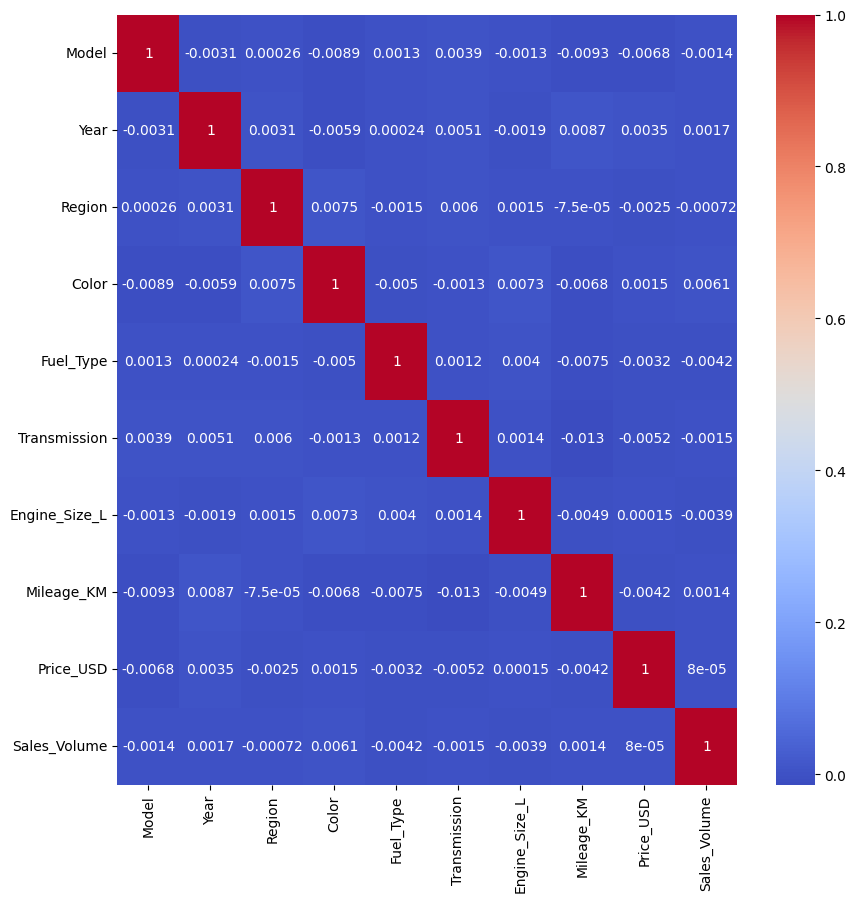

In [18]:
data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(),annot = True,cmap = "coolwarm")

No proper observations are make
For these kind of datasets we use feature engineering